#### 01 Import libaries and files

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
project_path = r'C:\Users\cneva\06-2024 Instacart Basket Analysis'

In [4]:
df_instacart = pd.read_pickle(os.path.join(project_path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

#### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

##### 01 Bar Chart 

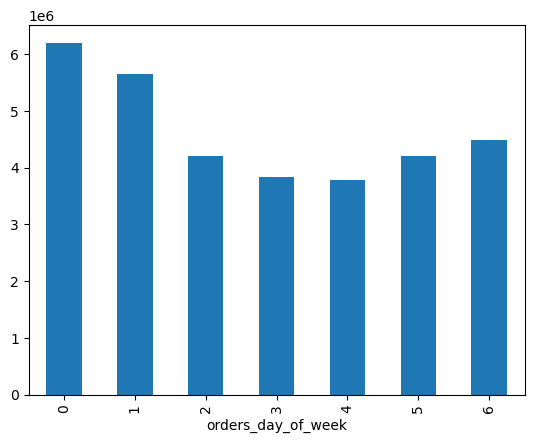

In [7]:
bar_chart_orders_dow = df_instacart['orders_day_of_week'].value_counts().sort_index().plot.bar()

##### 02 Histogram

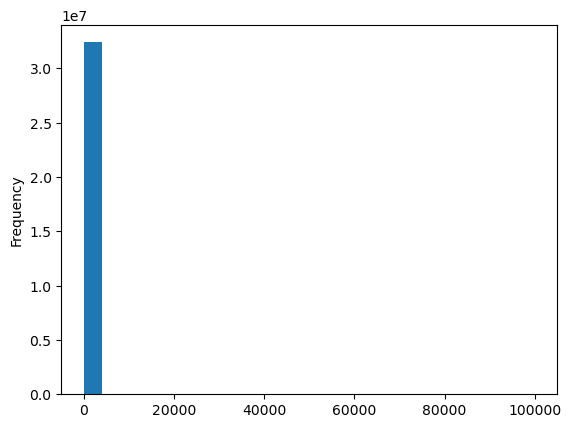

In [9]:
hist_price_frequency = df_instacart['prices'].plot.hist(bins = 25)

##### 03 Scatterplot 

<Axes: xlabel='prices', ylabel='prices'>

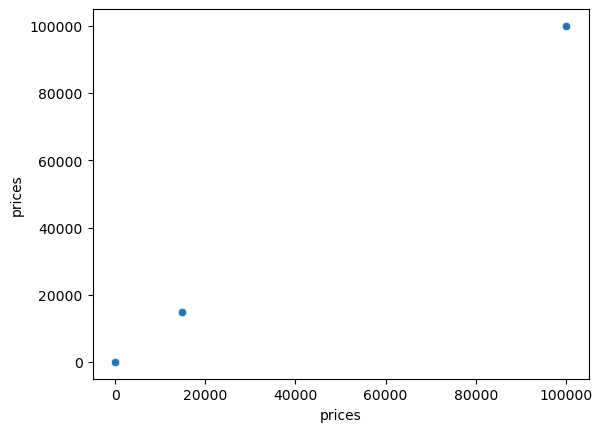

In [11]:
sns.scatterplot(x = 'prices', y = 'prices',data = df_instacart)

##### 04 Line  chart 

In [13]:
# create a subset of 70/30
# set seed
np.random.seed(4)

# create list of boolean values the size of the dataframe where true if the random values is <= .07
dev = np.random.rand(len(df_instacart)) <= 0.7

In [14]:
# create two subsets
big = df_instacart[dev]
small = df_instacart[~dev]

In [15]:
# check subsets
print(len(big) + len(small) == len(df_instacart))
print(len(big) / len(df_instacart))

True
0.7000111001871664


In [16]:
df_subset = small[['orders_day_of_week','prices']]

C:\Users\cneva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cneva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


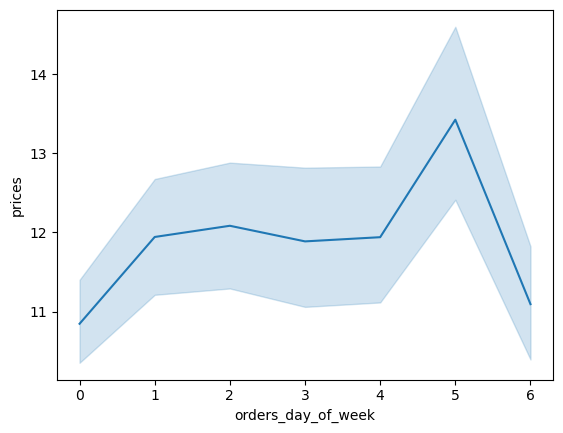

In [17]:
line_chart = sns.lineplot(data = df_subset, x = 'orders_day_of_week', y = 'prices')

#### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

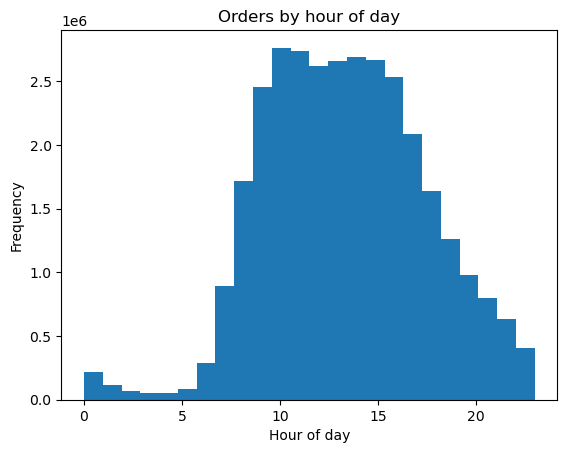

In [19]:
hist_hod = df_instacart['order_hour_of_day'].plot.hist(
    bins = 24,
    xlabel = 'Hour of day',
    title = 'Orders by hour of day'
)

##### The histogram shows that peak vs non peak hours are very different in the frequency of orders.  This shows that a majority of Instacarts resources should be allocated during the hours of ~9am - ~9 pm as this is the time when people would be making orders.

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

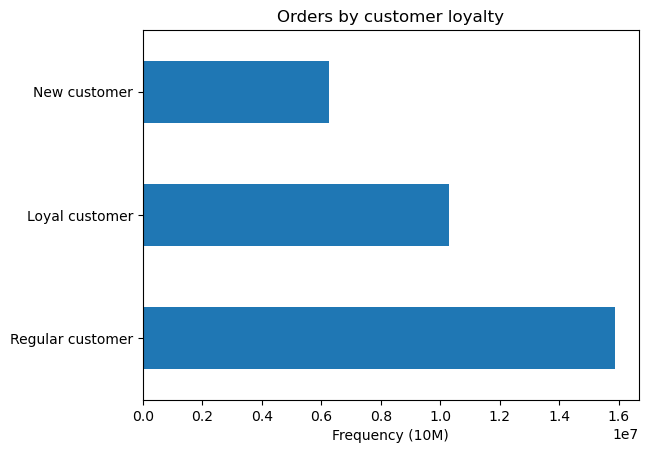

In [22]:
bar_loyalty = df_instacart['loyalty_flag'].value_counts().plot(
    kind = 'barh',
    xlabel = 'Frequency (10M)',
    ylabel = '',
    title = 'Orders by customer loyalty'
)

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [24]:
# create small subset of hour of day and prices
df_subset_2 = small[['order_hour_of_day','prices']]

C:\Users\cneva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cneva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Hour of day'),
 Text(0, 0.5, 'prices'),
 Text(0.5, 1.0, 'Prices by hour of day')]

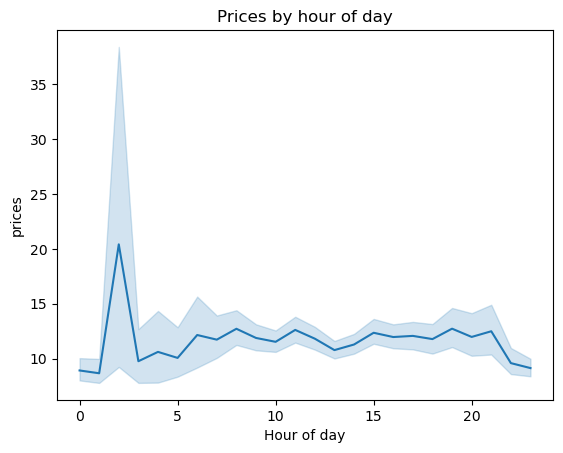

In [25]:
line_chart_2 = sns.lineplot(x = 'order_hour_of_day', y = 'prices', data = df_subset_2)
line_chart_2.set(
    xlabel = 'Hour of day',
    ylabel = 'prices',
    title = 'Prices by hour of day'
)

#### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [27]:
# create small subset of age and # of dependents
df_subset_3 = small[['age','n_dependants']]

C:\Users\cneva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cneva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'age'),
 Text(0, 0.5, '# of dependents'),
 Text(0.5, 1.0, 'age vs # of dependents')]

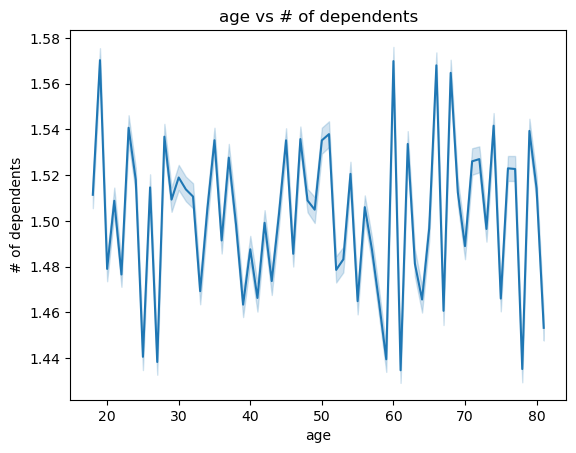

In [29]:
line_chart_3 = sns.lineplot(x = 'age', y = 'n_dependants', data = df_subset_3)
line_chart_3.set(
    xlabel = 'age',
    ylabel = '# of dependents',
    title = 'age vs # of dependents'
)

#### 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [32]:
# create small subset of age and income
df_subset_4 = small[['age','income']]

[Text(0.5, 0, 'age'), Text(0, 0.5, 'income'), Text(0.5, 1.0, 'age vs income')]

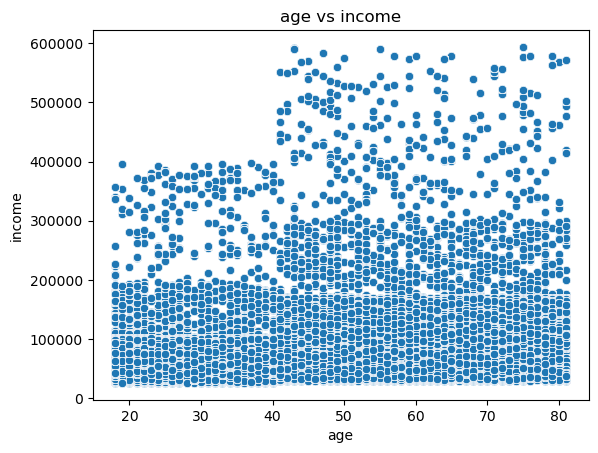

In [34]:
scatterplot_2 = sns.scatterplot(x = 'age', y = 'income', data = df_subset_4)
scatterplot_2.set(
    xlabel = 'age',
    ylabel = 'income',
    title = 'age vs income'
)

##### As age increases, particularly over 40 years old, the range of income increases. 

#### 8. Export your visualizations as “.png” files in your relevant project folder.

In [37]:
bar_chart_orders_dow.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'orders_dow.png'))

In [38]:
hist_price_frequency.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'price_frequency.png'))

In [39]:
hist_hod.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'orders_hod.png'))

In [40]:
bar_loyalty.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'loyalty_freqency.png'))

In [41]:
line_chart_2.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'prices_hod.png'))

In [42]:
line_chart_3.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'age_vs_dependents.png'))

In [43]:
scatterplot_2.figure.savefig(os.path.join(project_path, '04 Analysis', 'Visualizations', 'age_vs_income.png'))